# SI 618 - Homework #6: Machine Learning 1

Version 2021.03.21.2.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: linear regression,
machine learning pipeline, agglomerative clustering, k-means clustering, and t-SNE.

We will be using [graduate admissions data](https://www.kaggle.com/mohansacharya/graduate-admissions).

This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'cyuntao' # fill this in with your uniqname
# Do not modify the next three lines
import numpy as np
MY_UNIQHASH = hash(MY_UNIQNAME) & 2**32-1
np.random.seed(MY_UNIQHASH)
print(f"Random seed set to {MY_UNIQHASH}")

Random seed set to 279040606


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
admit = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/Admission_Predict.csv',
                    index_col="Serial No.")

In [4]:
admit.shape

(400, 8)

In [5]:
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Task 1 (5 points):
Perform basic exploratory data analyses on the variables in this dataframe.  Your work should include both
numerical **and** graphical overviews of the data.  The `multiplePlots` code might be helpful here.

In [6]:
admit.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [8]:
admit.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
admit.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)
admit.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
admit.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
admit.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

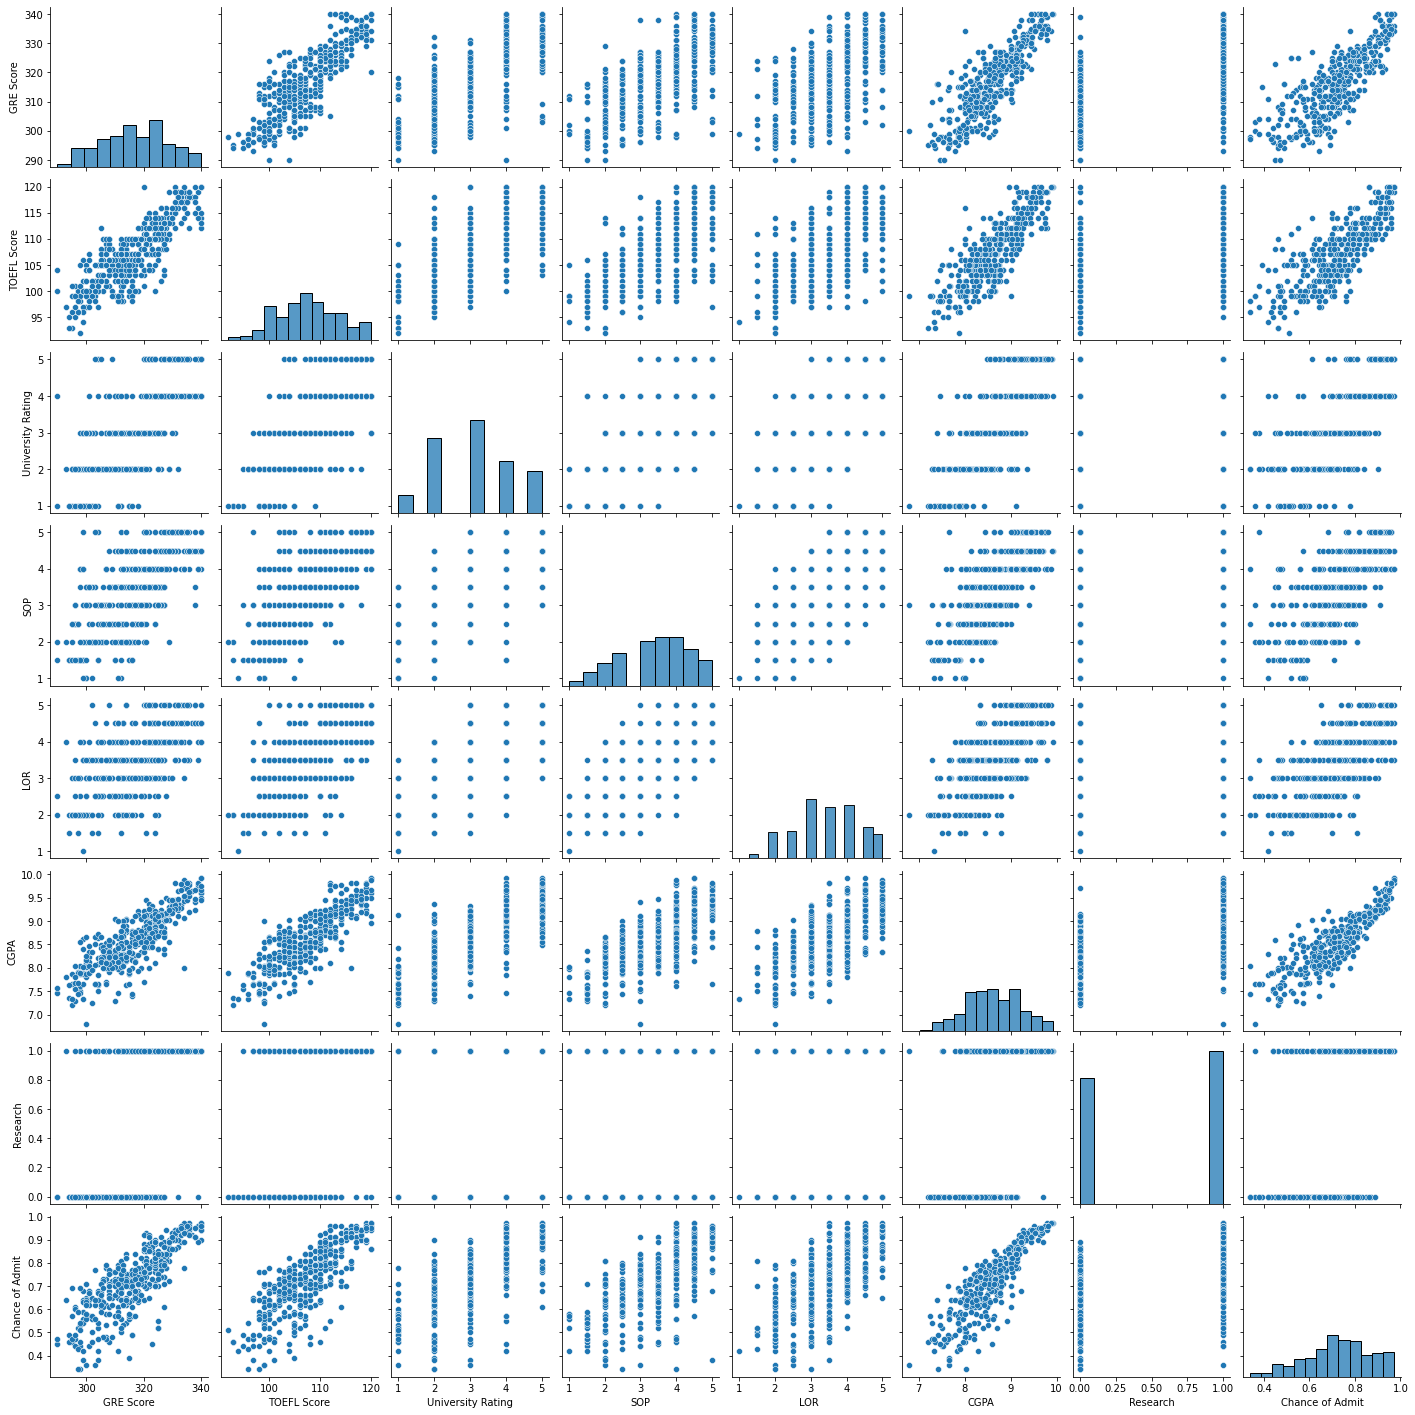

In [12]:
_ = sns.pairplot(admit)

In [13]:
admit_corr = admit.corr()
admit_corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


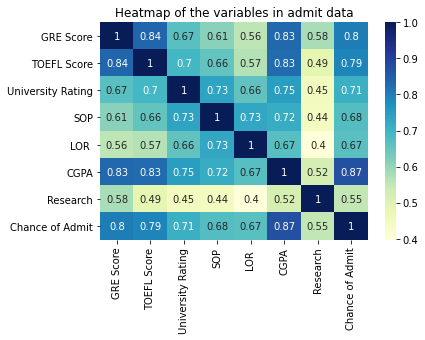

In [14]:
sns.heatmap(admit_corr, cmap="YlGnBu", annot=True)
_ = plt.title("Heatmap of the variables in admit data")

In [15]:
def multiplePlots( series, title ):
    fig, axs = plt.subplots(2,2)
    fig.suptitle(title)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Boxplot
    sns.boxplot(x=series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(x=current,y=lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(x=xr,y=qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(x=np.arange(len(series)),y=series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

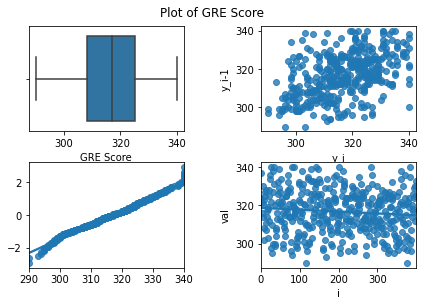

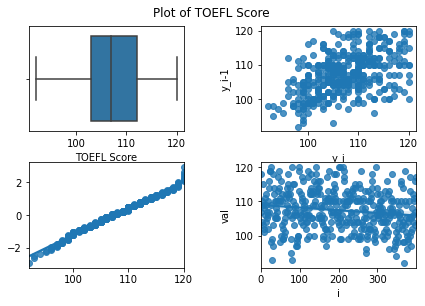

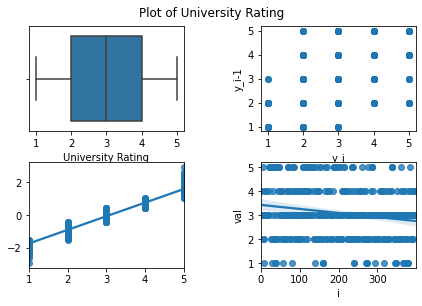

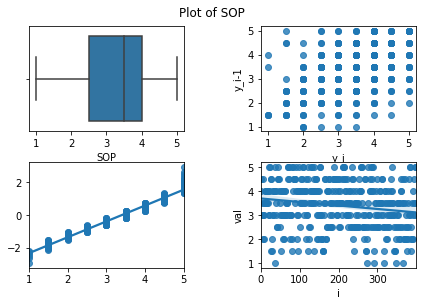

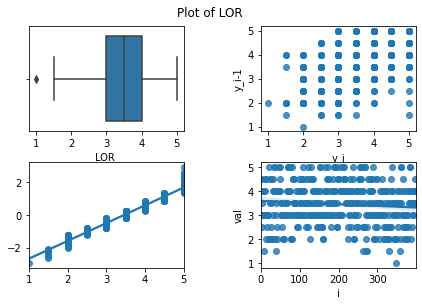

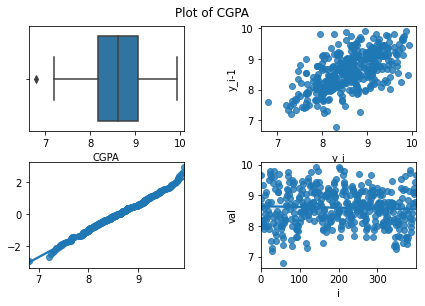

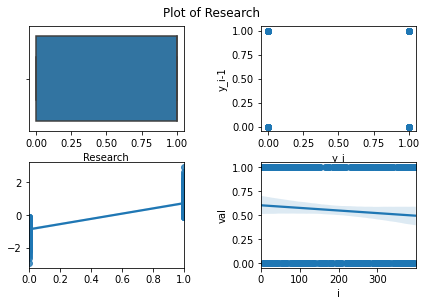

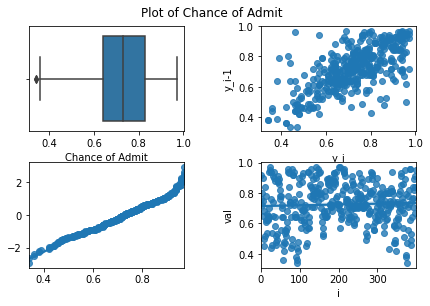

In [16]:
columns = list(admit)
  
for i in columns:
    multiplePlots(admit[i], "Plot of " + i)

**Task 1:**

From the result of `admit.describe()`, we can obtain a numerical overview of the data. For example:
* There are 400 data points in the dataframe. 
* The average value of `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR`, `CGPA`, `Research`, and `Chance of Admit` is 316.807500, 107.410000, 3.087500, 3.400000, 3.452500, 8.598925, 0.547500, and 0.724350, respectively.

From the result of `admit.columns`, we can see there is a weird space in the column name `Chance of Admit`, so I rename this column without the space.

From the result of `admit.info()` and `admit.isnull().sum()`, we can see there is no null value in the data.

From the result of `admit.nunique()`, we can see the number of unique values in each variable, as is shown above.

From the pairplot, it seems that `University Rating`, `SOP`, `LOR`  and `Research` have discrete values while the other variables have continuous values. However, I will not treat them as categorical data here, since the values have meaningful orders. It seems all of the variables are correlated with each other. For example, `GRE Score`, `TOEFL Score`, `CGPA` and `Chance of Admit` all seem to have linear relationships with the other three variables. Thus, I create a heatmap to see the relationships.

From the heatmap, we can see the variables do have strong correlations, In fact, it seems that all of the variables have large correlations with other variables. Among them, the correlation coefficients of the following pairs are the largest ones: (`Chance of Admit`, `CGPA`), (`GRE Score`, `TOEFL Score`), (`GRE Score`, `CGPA`), and (`GRE Score`, `Chance of Admit`).

Then I use the `multiplePlots` code to make boxplots, lag plots, QQ plots, and run sequence plots on each variable in the dataset.It seems that none of the variables have randomness and normal distributions. 

## Task 2a (15 points):
Use scikit-learn to conduct a linear regression that models the chance of admission based on the other variables.  Be sure to exclude "Serial No." as an explanatory variable.  Be sure to pre-process the data appropriately.  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [18]:
'''
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(admit, admit["University Rating"]):
    strat_train_set = admit.iloc[train_index]
    strat_test_set = admit.iloc[test_index]
'''
train_set, test_set = train_test_split(admit, test_size=0.2, random_state=42)

In [19]:
X_train = train_set.drop('Chance of Admit', axis=1)
y_train = train_set[['Chance of Admit']].copy()
X_test = test_set.drop('Chance of Admit', axis=1)
y_test = test_set[['Chance of Admit']].copy()

In [20]:
std_scaler = StandardScaler()
X_train_transformed = std_scaler.fit_transform(X_train)
X_train_transformed

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

In [21]:
lm = LinearRegression()
lm.fit(X_train_transformed, y_train)

LinearRegression()

In [22]:
X_test_transformed = std_scaler.transform(X_test)
y_pred = lm.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.0679485347692282

**Task 2a:**

As is stated above, I will not treat the variables with discrete values as categorical data, since the values have meaningful orders. I conduct a 80-20 train-test-split of the original dataframe. As there is no null value, we don't need to deal with missing values. Then I apply a standard scaler to the feature data.

My linear regression model has a root mean squared error (RMSE) of about 0.068 on the test data, which is relatively small, so it seems that the model's performance is reasonable.

## Task 2b (5 points):
Based on your work in the previous task, what is the probability of admission for someone with a GRE score or 325, a TOEFL score of 108, a university rating of 3, an statement of purpose score of 3.0, a letter of recommendation score of 3.5, a high-school grade point average of 8.9, and who has research experience.

In [23]:
X_2b = pd.DataFrame({
    'GRE Score': [325],
    'TOEFL Score': [108],
    'University Rating': [3],
    'SOP': [3],
    'LOR': [3.5],
    'CGPA': [8.9],
    'Research': [1]
})
lm.predict(std_scaler.transform(X_2b))

array([[0.78847264]])

**Task 2b:**

Based on my model, the probability of admission for this person is about 78.8%.

## Task 3 (5 points):
Decide on a reasonable value for a threshold for admission.  Pick a value that you would feel comfortable with if you wanted to know whether you were likely to be accepted into a graduate program.  Create a new variable called "admitted" that is set to 1 if the chance of admission value is equal to or greater than your chosen threshold, 0 otherwise.

In [24]:
admit['admitted'] = np.where(admit['Chance of Admit'] >= 0.75, 1, 0)
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,1
3,316,104,3,3.0,3.5,8.00,1,0.72,0
4,322,110,3,3.5,2.5,8.67,1,0.80,1
5,314,103,2,2.0,3.0,8.21,0,0.65,0


**Task 3:**

I think a reasonable value for a threshold would be 75%. The new variable called "admitted" is created, as is shown above. 

## Task 4 (20 points):
Using a random sample of approximately 40 rows from the original dataset, conduct an agglomerative clustering analysis using average linkage based on PCA projections of the original data onto 2 dimensions (remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first two principal components. 

Do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.

Create a dendrogram, pick an appropriate "cut line" and comment on the composition of each of the resulting clusters.  Comment on the degree to which the clusters correspond to admission probabilities (note: you may find it helpful to examine the values of "admitted").

In [25]:
samples = admit.sample(40, random_state=42)
X = samples.drop(['Chance of Admit', 'admitted'], axis=1)
y = samples[['Chance of Admit', 'admitted']].copy()

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=2, random_state=42)),
    ('cluster', AgglomerativeClustering(n_clusters=3, linkage='average')),
])

In [27]:
y_pred = pipe.fit_predict(X)
y_pred

array([0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [28]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.8134733313600959

In [29]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    threshold = kwargs.pop('color_threshold')
    plt.axhline(threshold, c='red')

c:\python\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


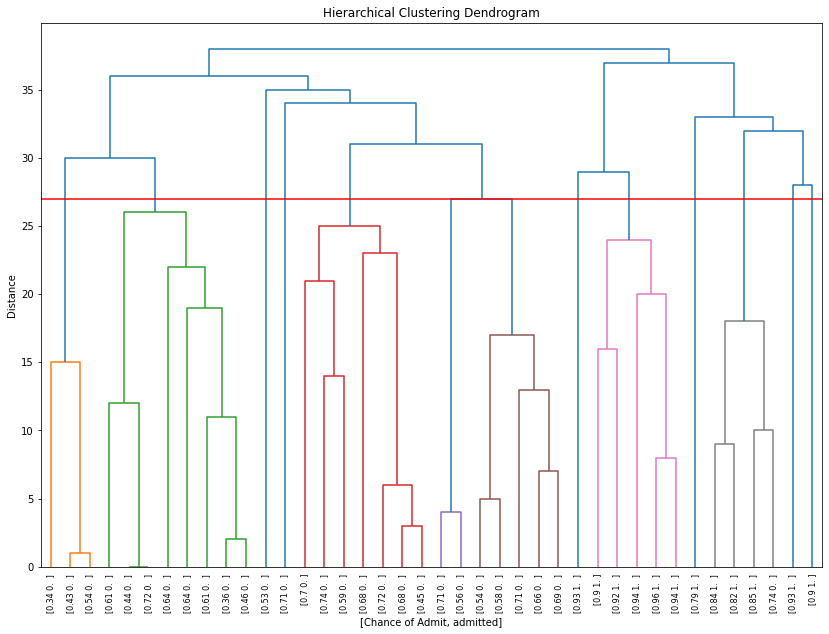

In [30]:
plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('[Chance of Admit, admitted]')
plt.ylabel('Distance')

plot_dendrogram(pipe.named_steps.cluster,labels=y.values, color_threshold=27)
plt.xticks(rotation=90)
plt.show() 

**Task 4:**

I use a random sample of exactly 40 rows here. As is shown above, the percentage of variance retained in the first two principal components is about 81.3%.

I pick the "cut line" at the height of 27. The labels are `[Chance of Admit, admitted]`. There are 12 clusters. It seems that the composition of the resulting clusters are related to the admission probabilities. The first cluster has 3 components with admission probablities around 40%. The second cluster has 8 components with admission probabilities around 40% to 65%. The third cluster and the fourth cluster only has 1 component each. The fifth cluster has 7 components with admission probabilities around 50% to 70%. The sixth cluster has 2 components with admission probabilities around 65%. The seventh cluster has 5 components with admission probabilities around 55% to 70%. The seventh cluster has 1 component with admission probability of 93%. The ninth cluster has 5 components with admission probabilities around 90% to 95%. The tenth cluster has 1 component with admission probability of 79%. The eleventh cluster has 4 components with admission probabilities around 80%. The last cluster has 2 components with admission probabilities around 90%.

From the graph, we can see the clusters are quite related to admisiion probabilities. Starting from the eighth cluster (from left to right), the admission probabilities become larger than 75%. The trend is shown clearly with labels of "admitted" becoming 1. Although sometimes fluctuations exist in admission probabilities of components in the same cluster, in general components with similar admission probabilites are likely to occur in the same cluster. 

## Task 5 (20 points):
Conduct a k-means clustering of the complete admissions data.  Pre-process the data using a 2-dimensional PCA (remember to scale your data before doing the PCA).  Again, do not use the chance of admission or the "admitted" variable you created earlier.  Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the optimal number of clusters.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = admit.drop(['Chance of Admit', 'admitted'], axis=1).values

For n_clusters = 2 the average silhouette_score is : 0.4153203495887576
For n_clusters = 3 the average silhouette_score is : 0.2229172663559271
For n_clusters = 4 the average silhouette_score is : 0.09564444279566606
For n_clusters = 5 the average silhouette_score is : 0.11812427047117843
For n_clusters = 6 the average silhouette_score is : 0.04823511812124798


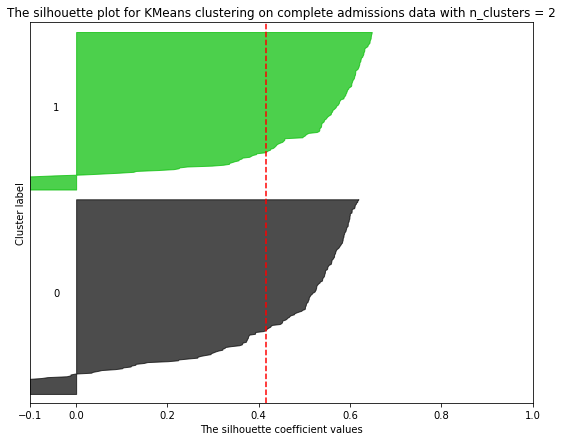

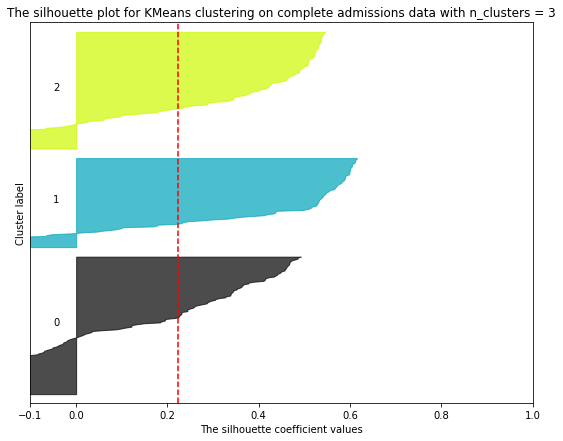

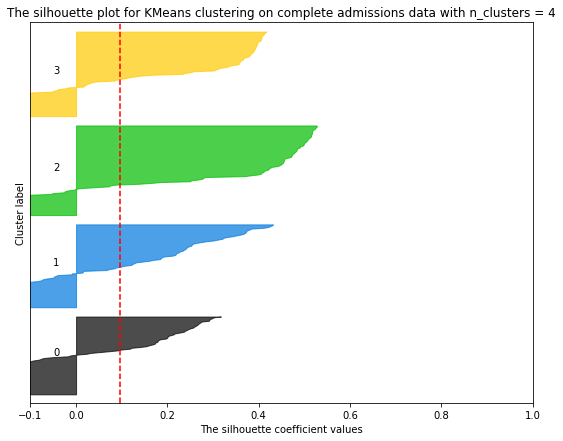

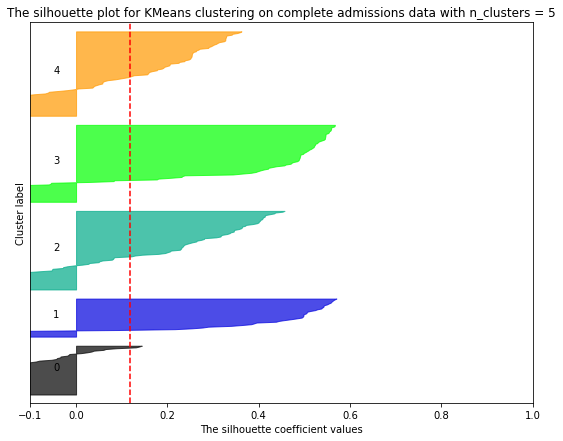

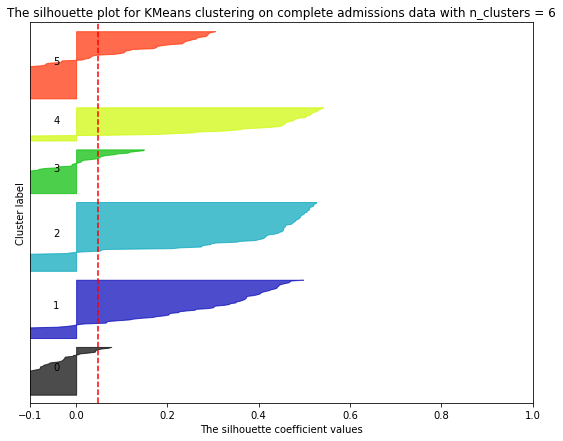

In [32]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    plt.figure(figsize=(9,7))
    
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    plt.xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('pca', PCA(n_components=2, random_state=42)),
        ('cluster', KMeans(n_clusters=n_clusters, random_state=42)),
    ])
    
    cluster_labels = pipe.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for KMeans clustering on complete admissions data "
                  "with n_clusters = %d" % n_clusters)
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Task 5:**

I test number of clusters from 2 to 6, and it seems that 2 is the optimal number of clusters since it has the the maximum average silhouette score. The silhouette plot for the optimal number of clusters, which is 2, has already been shown above.

## Task 6 (10 points):
Show the results of a t-SNE analysis of the complete admissions data.  As before, do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.  Color the points in your visualization based on the "admitted" variable you created earlier.

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

X = admit.drop(['Chance of Admit', 'admitted'], axis=1)
y = admit[['admitted']].copy()

Text(0.5, 1.0, 'Visualization of t-SNE analysis')

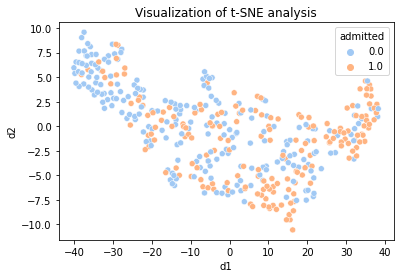

In [34]:
X_2d = tsne.fit_transform(X)
tsne_labelled = pd.concat([pd.DataFrame(y), pd.DataFrame(X_2d, columns=['d1', 'd2'])], axis=1)
sns.scatterplot(data=tsne_labelled,x='d1',y='d2', hue='admitted', palette='pastel')
plt.title('Visualization of t-SNE analysis')

**Task 6:**

I choose the perplexity to be 30 here. The result of a t-SNE analysis of the complete admissions data is shown above. I create a scatterplot to show the result, where the points in my visualization are colored based on the "admitted" variable.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.